**Chatbot Problem Statement :** 

AI / ML based Chatbot technology to be used in order to streamline work email , find files, answer user problems and scrape through URLs. Results is Automated speak or typed replies that answers user needs. Flow : Identify Problem of user using AI >> Analyze Problem using Machine learning /NLP models >> Solution /Results as replies (Text/speak) .

 
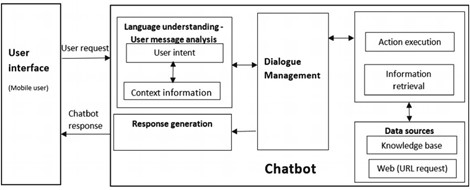

Basic Architecture 

Ideology: Rasa + Python( cloud based jupyter notebook colab) = Chatbot

Rasa- Rasa is a tool to build custom AI chatbots using Python and natural language understanding (NLU). link : https://rasa.com/

Google Colab-Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education.link: https://colab.research.google.com/?utm_source=scs-index#scrollTo=1S58V4NLil1c

In [1]:
#installing Rasa 
!pip install rasa==1.10.3

     |████████████████████████████████| 510 kB 5.5 MB/s 
     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 72 kB 366 kB/s 
     |████████████████████████████████| 3.2 MB 34.1 MB/s 
     |████████████████████████████████| 149 kB 43.8 MB/s 
     |████████████████████████████████| 509 kB 44.9 MB/s 
     |████████████████████████████████| 47 kB 4.9 MB/s 
     |████████████████████████████████| 990 kB 52.3 MB/s 
     |████████████████████████████████| 1.6 MB 39.1 MB/s 
     |████████████████████████████████| 3.0 MB 50.9 MB/s 
     |████████████████████████████████| 132 kB 50.7 MB/s 
     |████████████████████████████████| 51 kB 300 kB/s 
     |████████████████████████████████| 7.1 MB 41.5 MB/s 
     |████████████████████████████████| 1.2 MB 41.3 MB/s 
     |████████████████████████████████| 448 kB 49.4 MB/s 
     |████████████████████████████████| 266 kB 69.8 MB/s 
     |████████████████████████████████| 73 kB 1.8 MB/s 
     |███████████████████

In [2]:
#upgrade table from 3.7.0 to 3.6.1
!pip install -U tables==3.6.1

     |████████████████████████████████| 4.3 MB 7.4 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.7.0
    Uninstalling tables-3.7.0:
      Successfully uninstalled tables-3.7.0


In [3]:
#upgrade ipython to avoid crashing colab session, while doing restart the runtime.
!pip install -U ipython

     |████████████████████████████████| 793 kB 6.8 MB/s 
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 2.0.10 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.32.0 which is incompatible.


In [1]:
#install spacy package(NLP library used by rasa to understand user input) for rasa
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 7.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [2]:
#install nest_asyncio package(Jupyter notebook run on even loop , so to run rasa on Jupyter notebook in Asynchronous mode) 
!pip install nest_asyncio==1.3.3

  Attempting uninstall: nest-asyncio
    Found existing installation: nest-asyncio 1.5.4
    Uninstalling nest-asyncio-1.5.4:
      Successfully uninstalled nest-asyncio-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.12 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.


In [3]:
#importing all packages and apply nest_asyncio to notebook
import os
import rasa
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [4]:
#Creating initial project
from rasa.cli.scaffold import create_initial_project

In [5]:
#creating working director and store intial project
project = "test-project"
create_initial_project(project)

In [6]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

['__pycache__', '__init__.py', 'endpoints.yml', 'data', 'actions.py', 'config.yml', 'credentials.yml', 'domain.yml', 'tests']


In [7]:
#train rasa by creating few variables 
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


In [8]:
#Model Traning
#Another variable to call model 
#note run this cell for min 3 times as there is some bug in rasa if error
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Training Core model...


Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 112.40it/s, # actions=16]
Processed actions: 16it [00:00, 674.33it/s, # examples=16]
Epochs: 100%|██████████| 100/100 [00:14<00:00,  7.05it/s, t_loss=0.088, loss=0.015, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.
Epochs: 100%|██████████| 100/100 [00:15<00:00,  6.26it/s, t_loss=1.541, i_loss=0.157, i_acc=1.000]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20220315-090417.tar.gz'.
models/20220315-090417.tar.gz


In [9]:
#Chat with model 
from rasa.jupyter import chat
endpoints = 'endpoints.yml'
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
Hi
Hey! How are you?
I am good
Great, carry on!
ok
Bye
/stop
